<a href="https://colab.research.google.com/github/scholargj/SRET-INT200-JUNE2021/blob/master/Edit_Modal_PopUpPage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Full stack web development - Modal PopUp page**


*Authored by*

**Dr. Jayanthi Ganapathy,**

Assistant Professor,

Faculty of Engineering and Technology,

Sri Ramachandra Institute of Higher Education and Research,

Chennai - 600 116.

**Points to Note:** 

This notebook will explain the complete steps on how to fetch the data from SQLite and display in the Department page in Tabular form.

Refer to the GITHUB post as mentioned below.

Step-1. [To create Angular project, necessary Components and services, Click here](https://github.com/scholargj/SRET-INT200-JUNE2021/blob/master/RESTAPImethods_AngularProject.ipynb)


Step-2. [Add Bootstrap and Routing, Click here](https://github.com/scholargj/SRET-INT200-JUNE2021/blob/master/Bootstrap%26Routing_Fullstack.ipynb)(Continuation of Step-1)


# **Code the Edit Modal PopUp window**



The following methods will be used in Edit Modal PopUp window 

`editClick()`

The title of PopUp window is set using string interpolation

`{{ModalTitle}}`

A boolean variable `ActivateAddEditDepComp` to enable and disable 


**addw-dept.component.ts**

In [ ]:
import { Component, Input, OnInit } from '@angular/core';

@Component({
  selector: 'app-addw-dept',
  templateUrl: './addw-dept.component.html',
  styleUrls: ['./addw-dept.component.css']
})
export class AddwDeptComponent implements OnInit {

  
  constructor()   {  }
  
  @Input() dep:any;
  DepartmentId:string | any;
  DepartmentName:string | any;

  ngOnInit(): void 
  {
    this.DepartmentId=this.dep.DepartmentId;
    this.DepartmentName=this.dep.DepartmentName;
  }

}


**`show-dept.component.ts`**

In [ ]:
import { Component, OnInit } from '@angular/core';
import { SharedService } from 'src/app/shared.service';
@Component({
  selector: 'app-show-dept',
  templateUrl: './show-dept.component.html',
  styleUrls: ['./show-dept.component.css']
})
export class ShowDeptComponent implements OnInit {

  constructor(private service:SharedService) { }
  //create an empty list for department
  DepartmentList:any=[];
  ModalTitle:string | undefined;
  ActivateAddEditDepComp:boolean=false;
  dep:any;

ngOnInit(): void 
{
    this.refreshDepList();
}
refreshDepList()
{
  this.service.getDepList().subscribe(data=>{
    this.DepartmentList=data;});
}

addClick()
{
  this.dep=
  {
    DepartmentId:0,
    DepartmentName:""
  }
  this.ModalTitle="Add Department";
  this.ActivateAddEditDepComp=true;
}

editClick(item: any)
{
  this.dep=item;
  this.ModalTitle="Edit Department";
  this.ActivateAddEditDepComp=true;
}

closeClick()
{
  this.ActivateAddEditDepComp=false;
  this.refreshDepList();
}


}

**`show-dept.component.html`**

In [ ]:
<h1> This is show department page </h1>
<!-- Button trigger modal -->
<button type="button" class="btn btn-primary float-right m-2" 
data-toggle="modal" data-target="#exampleModal"
    (click)="addClick()"
data-backdrop="static" data-keyboard="false"
>
    Add Department
  </button>
    <!-- Modal -->
  <div class="modal fade" id="exampleModal" tabindex="-1" role="dialog" aria-labelledby="exampleModalLabel" aria-hidden="true">
    <div class="modal-dialog" role="document">
      <div class="modal-content">
        <div class="modal-header">
          <h5 class="modal-title" id="exampleModalLabel">{{ModalTitle}}</h5>
          <button type="button" class="close" 
          data-dismiss="modal" aria-label="Close"
          (click)="closeClick()"    
          >
            <span aria-hidden="true">&times;</span>
          </button>
        </div>
        <div class="modal-body">
            <app-addw-dept [dep]="dep" *ngIf="ActivateAddEditDepComp">
            </app-addw-dept>
        </div>
      </div>
    </div>
  </div>

<table class="table table-striped"> 
    <thead>
        <tr>
            <th>DepartmentId</th>
            <th>Department Name</th>
            <th>Options</th>
        </tr>
    </thead>
   
    <tbody>
        <tr *ngFor="let dataItem of DepartmentList">
            <td>{{dataItem.DepartmentId}}</td>
            <td>{{dataItem.DepartmentName}}</td>
            <td>
                <button type="button" class="btn btn-light mr-1"
                    data-toggle="modal" data-target="#exampleModal"
    (click)="editClick(dataItem)"
data-backdrop="static" data-keyboard="false">

                    Edit
                </button>
                <button type="button" class="btn btn-light mr-1">
                    Delete
                </button>
            </td>
        </tr>
    </tbody>


</table>


Click on Edit button in table to see the ouput as shown below

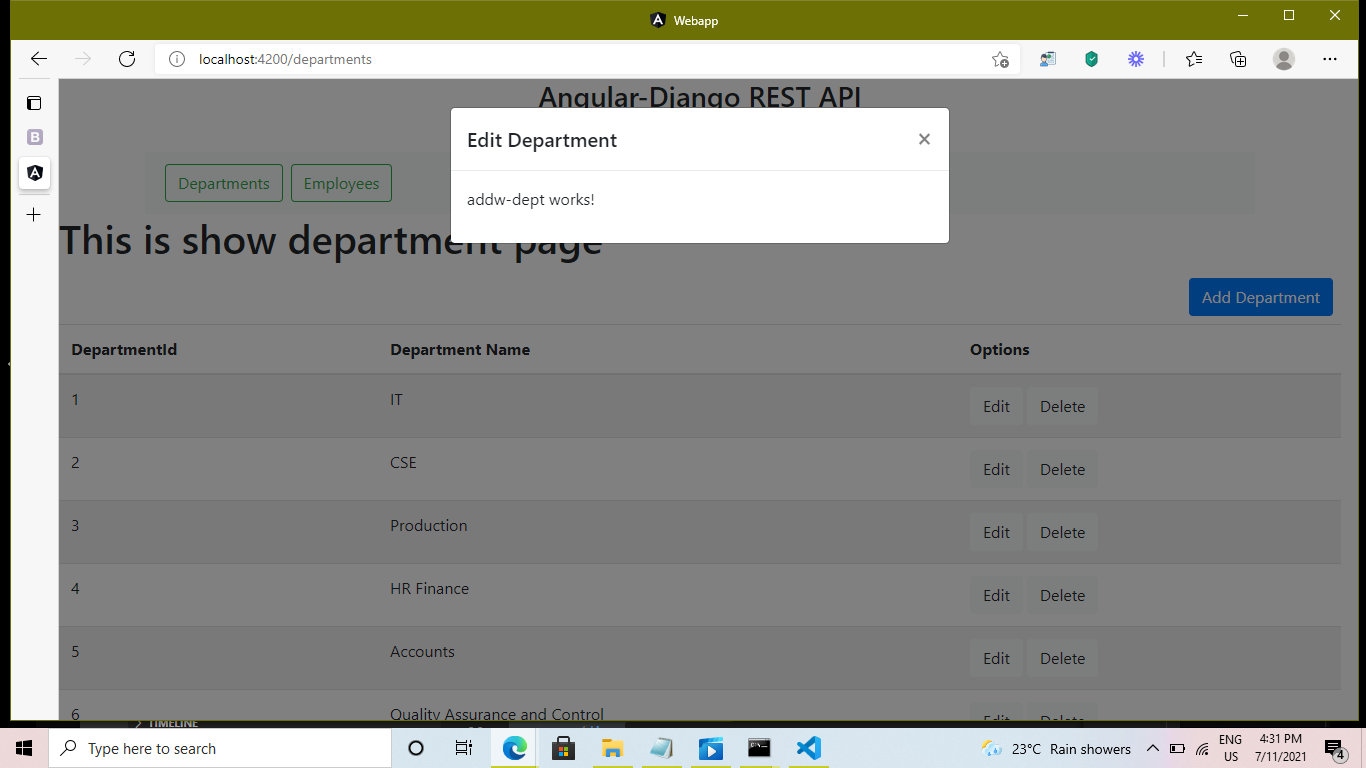